In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

In [2]:
df = pd.read_csv('/Users/harihara/UMD_Coursework/Fall_2021/CMSC829A/Project/Data/assembly_summary_bacteria.txt', 
                 sep = "\t", skiprows=1, low_memory = False)

In [3]:
df_complete_genomes = df[df['assembly_level'] == 'Complete Genome']

In [4]:
df_species_count = df_complete_genomes[['organism_name']]
df_species_count.loc[:,'Counts'] = 1
df_species_count = df_species_count.groupby('organism_name').sum()
df_species_count.sort_values(by = 'Counts', ascending = False, inplace = True)

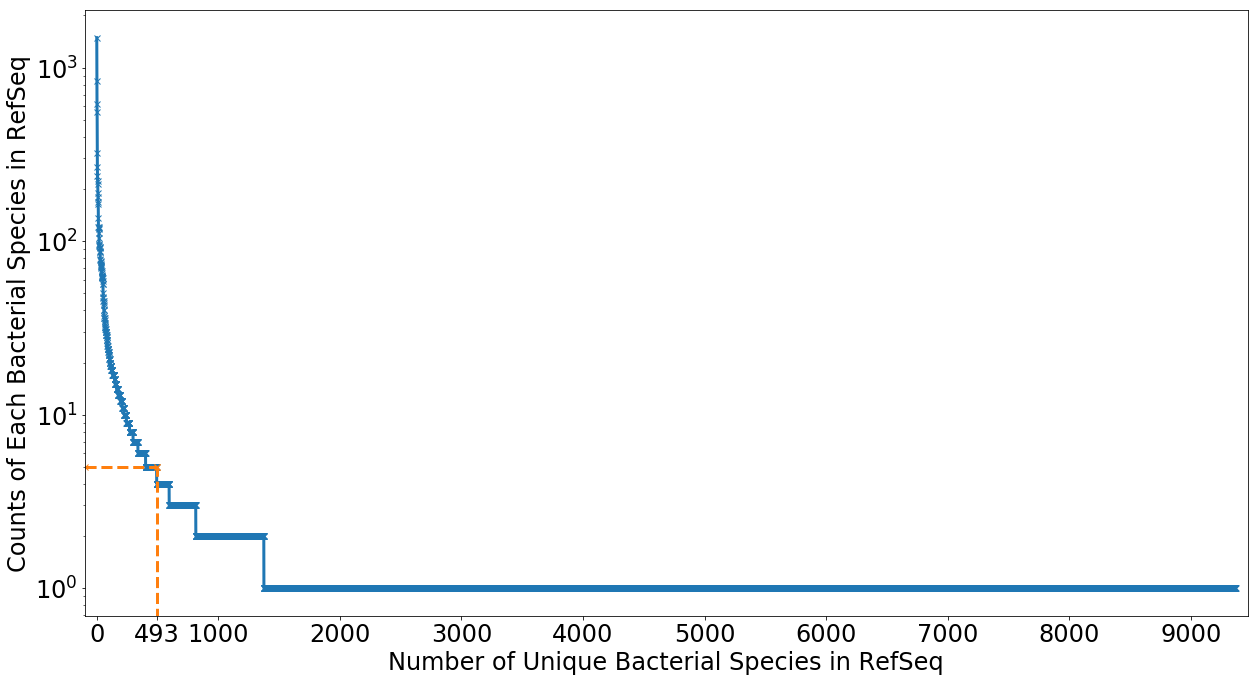

In [7]:
series = np.array(df_species_count['Counts'])
t = np.where(series >= 5)[0][-1]+1
fig,ax = plt.subplots(figsize=(18,10))
ax.plot(series, linewidth = '3', marker='x')
ax.set_yscale('log')
ax.set_xticks([])
ax.plot([-100,t],[5,5], color = 'C1', linewidth = '3', linestyle = '--', marker = 'x')
ax.plot([t,t],[0,5], color = 'C1', linewidth = '3', linestyle = '--', marker = 'x')
ax.set_xlim([-100,len(series)+100])
ax.set_xticks([t]+list(range(0, len(series), 1000)))
ax.set_ylabel('Counts of Each Bacterial Species in RefSeq')
ax.set_xlabel('Number of Unique Bacterial Species in RefSeq')
fig.tight_layout()
fig.savefig('../Plots/RefSeq_Species_Density.pdf')

In [8]:
species_of_interest = df_species_count[df_species_count['Counts'] >= 5].index.tolist()
df_complete_genomes_filtered = df_complete_genomes[df_complete_genomes['organism_name'].isin(species_of_interest)]

In [9]:
size = 4        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_complete_genomes_filtered = df_complete_genomes_filtered.groupby('organism_name', as_index=False).apply(fn).reset_index()

In [12]:
ftplinks = df_complete_genomes_filtered['ftp_path'].tolist()
f = open('FTP_Paths.txt','w')
for l in ftplinks:
    if l != 'na':
        f.write(l+'\n')
f.close()


In [13]:
for g in df_complete_genomes_filtered['organism_name'].tolist():
    if 'Salmonella' in g:
        print(g)

Salmonella enterica
Salmonella enterica
Salmonella enterica
Salmonella enterica
Salmonella enterica subsp. diarizonae
Salmonella enterica subsp. diarizonae
Salmonella enterica subsp. diarizonae
Salmonella enterica subsp. diarizonae
Salmonella enterica subsp. enterica
Salmonella enterica subsp. enterica
Salmonella enterica subsp. enterica
Salmonella enterica subsp. enterica
Salmonella enterica subsp. enterica serovar 1,4,[5],12:i:-
Salmonella enterica subsp. enterica serovar 1,4,[5],12:i:-
Salmonella enterica subsp. enterica serovar 1,4,[5],12:i:-
Salmonella enterica subsp. enterica serovar 1,4,[5],12:i:-
Salmonella enterica subsp. enterica serovar 4,[5],12:i:-
Salmonella enterica subsp. enterica serovar 4,[5],12:i:-
Salmonella enterica subsp. enterica serovar 4,[5],12:i:-
Salmonella enterica subsp. enterica serovar 4,[5],12:i:-
Salmonella enterica subsp. enterica serovar Agona
Salmonella enterica subsp. enterica serovar Agona
Salmonella enterica subsp. enterica serovar Agona
Salmonella